<a href="https://colab.research.google.com/github/haniafayed/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the dataset and Imports




In [ ]:
import os
os.chdir('/content')
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=f383f3394cc2f8fbc2f84c48c9b92d4a7616a0fb36bace0b0bafe4a5afb5b995
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanamagdymohamed","key":"ac93c0007a5a74fe47ca9aa47b7044fa"}'}

In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
os.chdir('/content')
! kaggle datasets download dmitrybabko/speech-emotion-recognition-en

 99% 974M/987M [00:04<00:00, 207MB/s]
100% 987M/987M [00:04<00:00, 227MB/s]


In [ ]:
 os.chdir('/content')
 ! mkdir ORL
 ! unzip speech-emotion-recognition-en.zip -d ORL

Streaming output truncated to the last 5000 lines.
  inflating: ORL/Crema/1088_IWW_FEA_XX.wav  
  inflating: ORL/Crema/1088_IWW_HAP_XX.wav  
  inflating: ORL/Crema/1088_IWW_NEU_XX.wav  
  inflating: ORL/Crema/1088_IWW_SAD_XX.wav  
  inflating: ORL/Crema/1088_MTI_ANG_XX.wav  
  inflating: ORL/Crema/1088_MTI_DIS_XX.wav  
  inflating: ORL/Crema/1088_MTI_FEA_XX.wav  
  inflating: ORL/Crema/1088_MTI_HAP_XX.wav  
  inflating: ORL/Crema/1088_MTI_NEU_XX.wav  
  inflating: ORL/Crema/1088_MTI_SAD_XX.wav  
  inflating: ORL/Crema/1088_TAI_ANG_XX.wav  
  inflating: ORL/Crema/1088_TAI_DIS_XX.wav  
  inflating: ORL/Crema/1088_TAI_FEA_XX.wav  
  inflating: ORL/Crema/1088_TAI_HAP_XX.wav  
  inflating: ORL/Crema/1088_TAI_NEU_XX.wav  
  inflating: ORL/Crema/1088_TAI_SAD_XX.wav  
  inflating: ORL/Crema/1088_TIE_ANG_XX.wav  
  inflating: ORL/Crema/1088_TIE_DIS_XX.wav  
  inflating: ORL/Crema/1088_TIE_FEA_XX.wav  
  inflating: ORL/Crema/1088_TIE_HAP_XX.wav  
  inflating: ORL/Crema/1088_TIE_NEU_XX.wav  
  in

In [ ]:
from scipy.io import wavfile
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import random

In [ ]:
os.chdir('/content/ORL/Crema')
directory = os.getcwd()
files=os.listdir(directory)
random.shuffle(files)

In [ ]:
samplerate_List=[]
data_List=[]
Labels=[]
sad_index =0
angry_index =0
dis_index =0
fea_index =0
happy_index =0
neu_index =0



for i in range(0,7442):
  data,samplerate=librosa.load('/content/ORL/Crema/'+str(files[i])) 
  samplerate_List.append(samplerate)
  data_List.append(data)
  Label= [0] * 6
  if "SAD" in str(files[i]) :
    Label[0]=1
    sad_index=i
  elif "ANG" in str(files[i]) :
    Label[1]=1
    angry_index=i
  elif "DIS" in str(files[i]) :
    Label[2]=1
    dis_index=i
  elif "FEA" in str(files[i]):
    Label[3]=1
    fea_index =i
  elif "HAP" in str(files[i]):
    Label[4]=1
    happy_index =i
  elif "NEU" in str(files[i]):
    Label[5]=1
    neu_index=i
  Labels.append(Label)

       


In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del files[:]

### Class visualization

In [ ]:
def Waveplot(emotion,index):
  plt.figure(figsize=(10, 3))
  plt.title(f'Waveplot for audio with'+str(emotion)+'emotion', size=15)
  librosa.display.waveplot(np.float32(data_List[index]), sr=samplerate_List[index])
  plt.show()
 

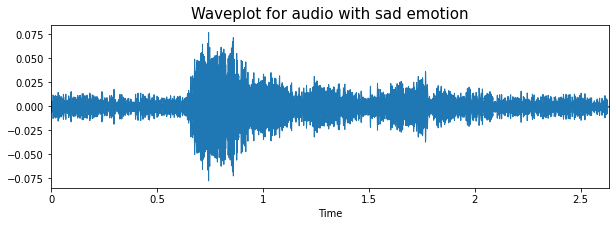

In [ ]:
Waveplot(" sad ",sad_index)
Audio('/content/ORL/Crema/'+str(files[sad_index]))

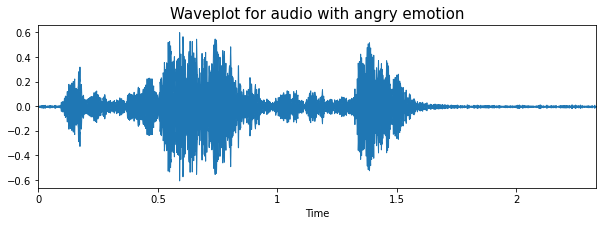

In [ ]:
Waveplot(" angry ",angry_index)
Audio('/content/ORL/Crema/'+str(files[angry_index]))

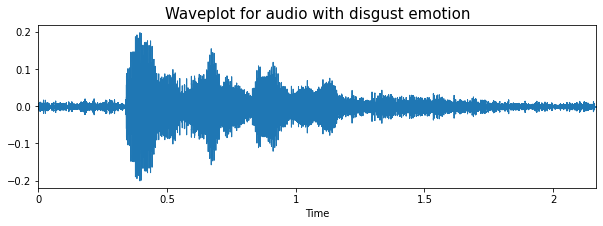

In [ ]:
Waveplot(" disgust ",dis_index)
Audio('/content/ORL/Crema/'+str(files[dis_index]))

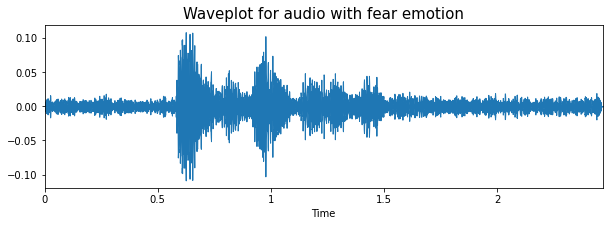

In [ ]:
Waveplot(" fear ",fea_index)
Audio('/content/ORL/Crema/'+str(files[fea_index]))

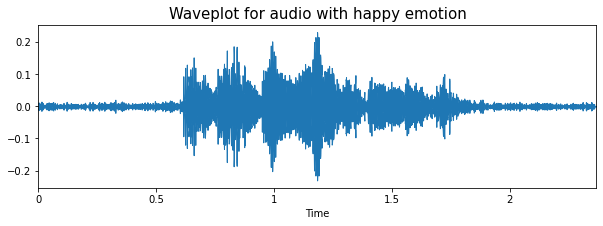

In [ ]:
Waveplot(" happy ",happy_index)
Audio('/content/ORL/Crema/'+str(files[happy_index]))

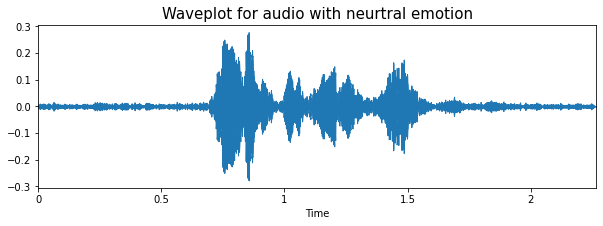

In [ ]:
Waveplot(" neurtral ",neu_index)
Audio('/content/ORL/Crema/'+str(files[neu_index]))

### Features extraction and padding

In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del neu_index
del sad_index
del happy_index
del fea_index
del dis_index
del angry_index

In [ ]:


def Features_extraction(DataList,samplerate):

  ZCR_List=[]
  Energy_List=[]
  melSpec_List=[]
  max_ZCR=0
  max_Energy=0
  max_YmelSpec=0
  max_XmelSpec=0

  for ind in range (0,len(DataList)):

    zcr=librosa.feature.zero_crossing_rate(y=DataList[ind])
    rms=librosa.feature.rms(y=DataList[ind])
    mel = librosa.filters.mel(sr=16000, n_fft=2048, n_mels=10)
    S = librosa.feature.melspectrogram(DataList[ind], sr=samplerate[ind], n_fft=2048, hop_length=512, n_mels=128)

    
    Xdb=librosa.power_to_db(S)
    ZCR_List.append(zcr[0])
    Energy_List.append(rms[0])
    melSpec_List.append(Xdb)
    yZcr=len(np.array(zcr[0]))
    yEn=len(np.array(rms[0]))
    xmel=len(np.array(Xdb))
    ymel=len(np.array(Xdb[0]))


    if(max_ZCR<yZcr):
      max_ZCR=yZcr
    if(max_Energy<yEn):
      max_Energy=yEn
    if(max_YmelSpec<ymel):
      max_YmelSpec=ymel
    if(max_XmelSpec<xmel):
      max_XmelSpec=xmel
      
  return  ZCR_List,Energy_List,melSpec_List,max_ZCR,max_Energy,max_YmelSpec,max_XmelSpec



In [ ]:
def padding(ZCR_List,Energy_List,melSpec_List,max_ZCR,max_Energy,max_YmelSpec,max_XmelSpec):
  
  ZCR_List_Padded=[]
  Energy_List_Padded=[]
  Spect_Padded=[]


  for i in range (0,7442):
    if len(ZCR_List[i])<=max_ZCR:
      N =max_ZCR-len(ZCR_List[i])
      padding=np.zeros((1,N))
      ZCR_List_Padded.append(np.append(ZCR_List[i],padding))
    


    if len(Energy_List[i])<=max_Energy:
      N =max_Energy-len(Energy_List[i])
      padding=np.zeros((1,N))
      Energy_List_Padded.append(np.append(Energy_List[i],padding))
   

    if len(melSpec_List[i][0])<max_YmelSpec:   
      N =max_YmelSpec-len(melSpec_List[i][0])
      melSpec_List[i].resize((max_XmelSpec,max_YmelSpec),refcheck=False)

      
  return ZCR_List_Padded,Energy_List_Padded,melSpec_List


In [ ]:

ZCR_List,Energy_List,melSpec_List,max_ZCR,max_Energy,max_YmelSpec,max_XmelSpec=Features_extraction(data_List,samplerate_List)

[[-11.525087 -10.163641 -10.845766 ... -12.095301 -10.549551 -13.158179]
 [-16.988192 -14.94026  -13.765671 ... -13.272587 -14.888407 -17.126696]
 [ -8.303164 -10.943952 -12.791671 ... -13.222152 -11.858728 -14.367678]
 ...
 [-65.35325  -65.35325  -65.35325  ... -65.35325  -65.35325  -65.35325 ]
 [-65.35325  -65.35325  -65.35325  ... -65.35325  -65.35325  -65.35325 ]
 [-65.35325  -65.35325  -65.35325  ... -65.35325  -65.35325  -65.35325 ]]
(128, 121)


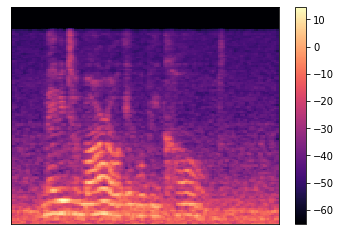

In [ ]:
print(melSpec_List[0])
print(np.array(melSpec_List[0]).shape)
plt.figure()
librosa.display.specshow(melSpec_List[0],sr=samplerate_List[0])
plt.colorbar()

In [ ]:
 ZCR_List_Padded,Energy_List_Padded,Spect_Padded=padding(ZCR_List,Energy_List,melSpec_List,max_ZCR,max_Energy,max_YmelSpec,max_XmelSpec)

In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del ZCR_List
del Energy_List
del melSpec_List
del max_ZCR
del max_Energy
del max_YmelSpec
del max_XmelSpec

### Dataset Splitting

In [ ]:
Training=data_List[0:4838]
Training_SampleRate=samplerate_List[0:4838]
Training_Labels=Labels[0:4838]

Validation=data_List[4838:5209]
Validation_Labels=Labels[4838:5209]

Testing=data_List[5209:7442]
Testing_Labels=Labels[5209:7442]

print(np.array(Training).shape)
print(np.array(Testing).shape)
print(np.array(Validation).shape)

(4838,)
(2233,)
(371,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del data_List
del samplerate_List
del Labels

In [ ]:
Training_ZCR=ZCR_List_Padded[0:4838]
Validation_ZCR=ZCR_List_Padded[4838:5209]
Testing_ZCR=ZCR_List_Padded[5209:7442]



Training_Energy=Energy_List_Padded[0:4838]
Validation_Energy=Energy_List_Padded[4838:5209]
Testing_Energy=Energy_List_Padded[5209:7442]

Training_Spec=Spect_Padded[0:4838]
Validation_Spec=Spect_Padded[4838:5209]
Testing_Spec=Spect_Padded[5209:7442]
Training_Spec=np.array(Training_Spec).reshape((4838,128,216,1))



In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del ZCR_List_Padded
del Energy_List_Padded
del Spect_Padded

In [ ]:
print(np.array(Training_Spec).shape)
print(np.array(Training_Labels).shape)
print(np.array(Testing_Energy).shape)
Training_Energy=np.array(Training_Energy).reshape((4838,216,1))
Training_ZCR=np.array(Training_ZCR).reshape((4838,216,1))

(4838, 128, 216, 1)
(4838, 6)
(2233, 216)


### Data Augmentation

In [ ]:
import tensorflow as tf

def sample_beta_distribution(size,alpha):
    concentration_0=alpha
    concentration_1=alpha
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(images_one, images_two,labels_one,labels_two,alpha):
    
   
    batch_size = images_one.shape[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

In [ ]:
def pitch_shifting():
 # y_third = librosa.effects.pitch_shift(y, sr, n_steps=4) #Shift up by a major third
  #y_tritone =librosa.effects.pitch_shift(y, sr, n_steps=-6) #Shift down by a tritone
  #y_three_qt = librosa.effects.pitch_shift(y, sr, n_steps=3,bins_per_octave=24) #Shift up by 3 quarter-
  PitchChange=[]
  for i in range (0,len(Training)):
    pitch_change =  4*(np.random.uniform())   
    y_pitch = librosa.effects.pitch_shift(Training[i].astype('float64'),Training_SampleRate[i], n_steps=pitch_change, bins_per_octave=12)
    PitchChange.append(y_pitch)
  return PitchChange




In [ ]:
def Noise_Injection():
  WithNoise=[]
  for i in range(0,len(Training)):
    noise_amp = 0.04*np.random.uniform()*np.amax(Training[i])
    sound = Training[i].astype('float64') + noise_amp * np.random.normal(size=np.array(Training[i]).shape[0])
    WithNoise.append(sound)
  return WithNoise


In [ ]:
length = len(Training_Spec)
middle_index = length//2
images_one = Training_Spec[:middle_index]
images_two = Training_Spec[middle_index:]
labels_one = Training_Labels[:middle_index]
labels_two = Training_Labels[middle_index:]

MixedUp_Mel_spec,MixedUp_Labels=mix_up(images_one, images_two,labels_one,labels_two, 0.4)


In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del length
del images_one
del images_two
del labels_one
del labels_two

In [ ]:
print(np.array(MixedUp_Mel_spec).shape)
MixedUp_Mel_spec=np.array(MixedUp_Mel_spec)
print(np.array(MixedUp_Labels).shape)
MixedUp_Labels=np.array(MixedUp_Labels)

(2419, 128, 216, 1)
(2419, 6)


In [ ]:
WithNoise=Noise_Injection()
ZCR_List_Ps,Energy_List_Ps,melSpec_List_PS,max_ZCR_Ps,max_Energy_Ps,max_YmelSpec_Ps,max_XmelSpec_Ps=Features_extraction(WithNoise,Training_SampleRate)
ZCR_List_Padded_PS,Energy_List_Padded_PS,Spect_Padded_PS=padding(ZCR_List_Ps,Energy_List_Ps,melSpec_List_PS,max_ZCR_Ps,max_Energy_Ps,max_YmelSpec_Ps,max_XmelSpec_Ps)


In [ ]:
AugmentedTraining_Spec=[]
#Spect_Padded_PS=np.array(Spect_Padded_PS).reshape((4838, 128, 216, 1))
AugmentedTraining_Spec = [*Training_Spec]
print(np.array(AugmentedTraining_Spec).shape)

AugmentedTraining_Spec_Labels=[]
AugmentedTraining_Spec_Labels = [*Training_Labels]
print(np.array(AugmentedTraining_Spec_Labels).shape)

In [ ]:
#Clean Up
import gc
gc.enable()
gc.collect()
del Energy_List_Ps
del melSpec_List_PS
del max_ZCR_Ps
del max_Energy_Ps
del max_YmelSpec_Ps
del max_XmelSpec_Ps
del ZCR_List_Padded_PS
del Energy_List_Padded_PS
del Spect_Padded_PS
del Training_Labels
del Training_Spec
#del MixedUp_Mel_spec
#del MixedUp_Labels


### 2D Models 

In [ ]:
import torch.nn.functional as F 
from torch.nn import init
import keras
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Flatten,Dense,Input,Dropout,BatchNormalization,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
from keras import regularizers
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.regularizers import l2

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def Accuracy_Fmeasure(classifier,Testing):
 loss, accuracy, f1_score = classifier.evaluate(np.array(Testing), np.array(Testing_Labels), verbose=0)
 print('Test loss:', loss) 
 print('Test accuracy:', accuracy)
 print('F_measure:',f1_score)
 y=classifier.predict((np.array(Testing)).reshape(2233,128,216,1))
 y_pred=np.argmax(y,1)
 y_test=np.argmax(Testing_Labels,1)
 matrix =confusion_matrix(y_test, y_pred, num_classes=6)
 ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])
 


In [ ]:
def Plotting(history):
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()


In [ ]:
def Model1_2D(Training_Spec,Training_Labels):
  classifier = Sequential()
  classifier.add(Conv2D(32,11, 11, input_shape = (128,216,1),padding='same',activation = 'relu'))
  classifier.add(Conv2D(32,7, 7,padding='same',kernel_regularizer=regularizers.l2(0.001)))
  classifier.add(Conv2D(32,7, 7,padding='same'))
  classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  classifier.add(Dropout(0.4))
  classifier.add(Conv2D(64,5, 5,padding='same',kernel_regularizer=regularizers.l2(0.001)))
  classifier.add(Conv2D(64,3, 3,padding='same'))
  classifier.add(Conv2D(64,3, 3,padding='same'))
  classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  classifier.add(Dropout(0.4))
  classifier.add(Conv2D(64,3, 3,padding='same',kernel_regularizer=regularizers.l2(0.001)))
  classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  classifier.add(Flatten())
  classifier.add(Dense(10000,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
  classifier.add(Dropout(0.5))
  classifier.add(Dense(6, activation = 'softmax'))
  adam = Adam(learning_rate=0.0001)
  classifier.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy',f1_m])
  

  history =classifier.fit(np.array(Training_Spec), np.array(Training_Labels),batch_size=50,epochs=70,verbose=1,validation_data=(np.array(Validation_Spec), np.array(Validation_Labels)))
 
  print('\nhistory dict:', history.history)

  Plotting(history)
  Accuracy_Fmeasure(classifier,Testing_Spec)


  



Epoch 1/70
97/97 [==============================] - 8s 54ms/step - loss: 1.7865 - accuracy: 0.1876 - f1_m: 2.0100e-05 - val_loss: 1.7524 - val_accuracy: 0.2507 - val_f1_m: 0.0000e+00
Epoch 2/70
97/97 [==============================] - 5s 47ms/step - loss: 1.7246 - accuracy: 0.2590 - f1_m: 0.0086 - val_loss: 1.5065 - val_accuracy: 0.3774 - val_f1_m: 0.1804
Epoch 3/70
97/97 [==============================] - 5s 48ms/step - loss: 1.5303 - accuracy: 0.3525 - f1_m: 0.1450 - val_loss: 1.4069 - val_accuracy: 0.3962 - val_f1_m: 0.1655
Epoch 4/70
97/97 [==============================] - 5s 48ms/step - loss: 1.4887 - accuracy: 0.3880 - f1_m: 0.1924 - val_loss: 1.4466 - val_accuracy: 0.4070 - val_f1_m: 0.1668
Epoch 5/70
97/97 [==============================] - 5s 48ms/step - loss: 1.4398 - accuracy: 0.4230 - f1_m: 0.2086 - val_loss: 1.4075 - val_accuracy: 0.4043 - val_f1_m: 0.1539
Epoch 6/70
97/97 [==============================] - 5s 48ms/step - loss: 1.4381 - accuracy: 0.4196 - f1_m: 0.1957 - v

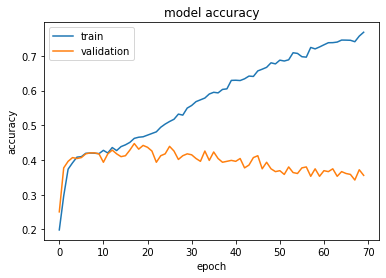

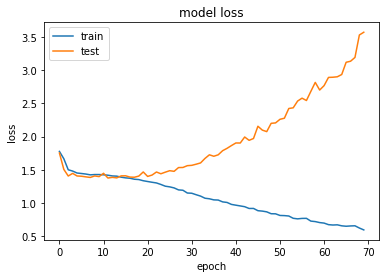

Test loss: 3.976940870285034
Test accuracy: 0.343484103679657
F_measure: 0.3340221345424652


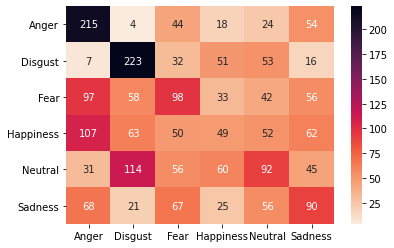

In [ ]:
Model1_2D(Training_Spec,Training_Labels)

In [ ]:

def Model4_2D():
 
 classifier = Sequential()
 classifier.add(Conv2D(32,3, 3, input_shape = (128,216,1),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.05)))
 classifier.add(Conv2D(32,3, 3,padding='same',kernel_regularizer=regularizers.l2(0.01)))
 classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
 classifier.add(Dropout(0.25))
 classifier.add(Conv2D(64,3, 3,padding='same',kernel_regularizer=regularizers.l2(0.01)))
 classifier.add(Conv2D(64,3, 3,padding='same',kernel_regularizer=regularizers.l2(0.01)))
 classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
 classifier.add(Dropout(0.25))
 classifier.add(Conv2D(64,3, 3,padding='same',kernel_regularizer=regularizers.l2(0.01)))
 classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
 classifier.add(Flatten())
 classifier.add(Dense(10000,activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
 classifier.add(Dropout(0.5))
 classifier.add(Dense(6, activation = 'softmax',kernel_regularizer=regularizers.l2(0.01)))
 adam = Adam(learning_rate=0.0001)
 classifier.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy',f1_m])
 history =classifier.fit(np.array(Training_Spec), np.array(Training_Labels),batch_size=50,epochs=30,verbose=1,validation_data=(np.array(Validation_Spec), np.array(Validation_Labels)))
 
 print('\nhistory dict:', history.history)
 Plotting(history)
 Accuracy_Fmeasure(classifier,Testing_Spec)
 



 

Epoch 1/30
97/97 [==============================] - 14s 118ms/step - loss: 1.7341 - accuracy: 0.2308 - f1_m: 0.0169 - val_loss: 1.5402 - val_accuracy: 0.3477 - val_f1_m: 0.1336
Epoch 2/30
97/97 [==============================] - 11s 113ms/step - loss: 1.4903 - accuracy: 0.3782 - f1_m: 0.1857 - val_loss: 1.5242 - val_accuracy: 0.3423 - val_f1_m: 0.2011
Epoch 3/30
97/97 [==============================] - 11s 112ms/step - loss: 1.4529 - accuracy: 0.4033 - f1_m: 0.2086 - val_loss: 1.4899 - val_accuracy: 0.3989 - val_f1_m: 0.2167
Epoch 4/30
97/97 [==============================] - 11s 112ms/step - loss: 1.4715 - accuracy: 0.4080 - f1_m: 0.2159 - val_loss: 1.4756 - val_accuracy: 0.4097 - val_f1_m: 0.2005
Epoch 5/30
97/97 [==============================] - 11s 112ms/step - loss: 1.4425 - accuracy: 0.4040 - f1_m: 0.2329 - val_loss: 1.4590 - val_accuracy: 0.4070 - val_f1_m: 0.1772
Epoch 6/30
97/97 [==============================] - 11s 113ms/step - loss: 1.3971 - accuracy: 0.4397 - f1_m: 0.2495

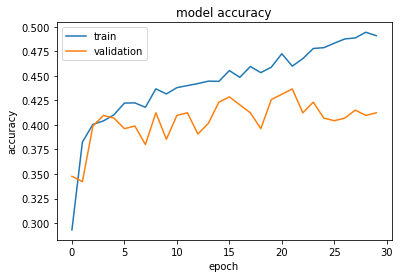

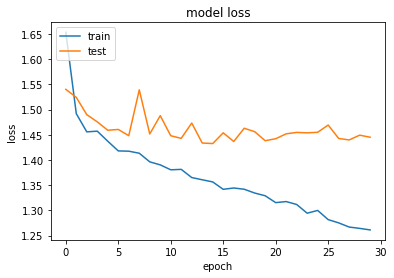

Test loss: 1.4308394193649292
Test accuracy: 0.4317062199115753
F_measure: 0.2866675853729248


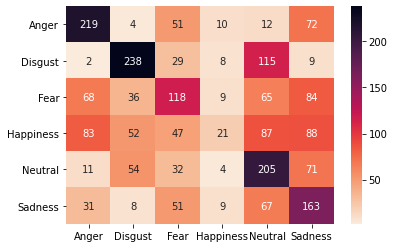

In [ ]:
Model4_2D() 

###1D Models

In [ ]:
def Accuracy_Fmeasure_1D(classifier,Testing):
 loss, accuracy, f1_score = classifier.evaluate(np.array(Testing), np.array(Testing_Labels), verbose=0)
 print('Test loss:', loss) 
 print('Test accuracy:', accuracy)
 print('F_measure:',f1_score)
 y=classifier.predict((np.array(Testing)).reshape(2233,216,1))
 y_pred=np.argmax(y,1)
 y_test=np.argmax(Testing_Labels,1)
 matrix =confusion_matrix(y_test, y_pred, num_classes=6)
 ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])
 


In [ ]:
def Model1_1D():
  inputs = Input(shape=(216,1))
  #First Conv1D layer
  conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
  conv = MaxPooling1D(3)(conv)
  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='valid', activation='relu',kernel_regularizer=regularizers.l2(0.001),strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  #Third Conv1D layer
  conv = Conv1D(32, 9, padding='valid', activation='relu',kernel_regularizer=regularizers.l2(0.001), strides=1)(conv)
  conv=Dropout(0.5)(conv)
  conv = MaxPooling1D(3)(conv)
  #Fourth Conv1D layer
  conv = Conv1D(64, 7,padding='same',activation='sigmoid', strides=1)(conv)
  conv=Dropout(0.5)(conv)
  conv = MaxPooling1D(3)(conv)
  #Flatten layer
  conv = Flatten()(conv)
  #Dense Layer 1
  conv = Dense(512, activation='relu')(conv)
  #Dense Layer 2
  conv = Dense(256, activation='relu')(conv)
  outputs = Dense(6 ,activation='softmax')(conv)
  model = Model(inputs, outputs)
  adam = Adam(lr=0.008)
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy',f1_m])
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.0001) 
  mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  history=model.fit(np.array(Training_Energy), np.array(Training_Labels),epochs=100, callbacks=[es,mc], batch_size=48, validation_data=(np.array(Validation_Energy), np.array(Validation_Labels)))
  Plotting(history)
  Accuracy_Fmeasure_1D(model,Testing_Energy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
101/101 [==============================] - 4s 20ms/step - loss: 1.6982 - accuracy: 0.2596 - f1_m: 0.0900 - val_loss: 1.6315 - val_accuracy: 0.2749 - val_f1_m: 0.0202
Epoch 2/100
101/101 [==============================] - 2s 16ms/step - loss: 1.5514 - accuracy: 0.3512 - f1_m: 0.1492 - val_loss: 1.6123 - val_accuracy: 0.2776 - val_f1_m: 0.0000e+00
Epoch 3/100
101/101 [==============================] - 2s 17ms/step - loss: 1.5234 - accuracy: 0.3683 - f1_m: 0.1714 - val_loss: 1.5656 - val_accuracy: 0.3288 - val_f1_m: 0.0537
Epoch 4/100
101/101 [==============================] - 2s 16ms/step - loss: 1.5113 - accuracy: 0.3774 - f1_m: 0.1794 - val_loss: 1.6000 - val_accuracy: 0.2695 - val_f1_m: 0.0203
Epoch 5/100
101/101 [==============================] - 2s 16ms/step - loss: 1.4943 - accuracy: 0.3890 - f1_m: 0.1885 - val_loss: 1.5695 - val_accuracy: 0.3181 - val_f1_m: 0.0000e+00
Epoch 6/100
101/101 [==============================] - 2s 17ms/step - loss: 1.4921 - accuracy: 0.3936 

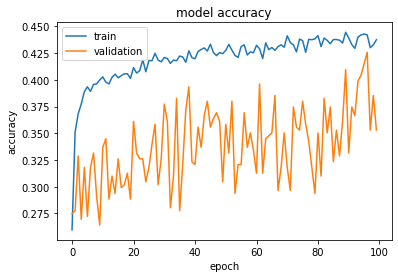

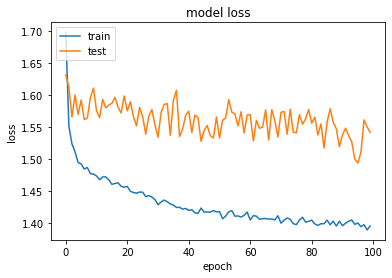

Test loss: 1.5617682933807373
Test accuracy: 0.34124496579170227
F_measure: 0.046745531260967255


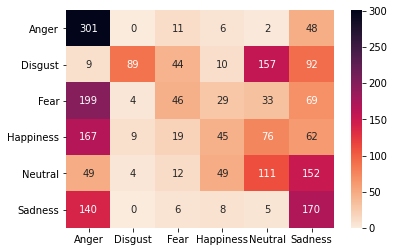

In [ ]:
Model1_1D()

In [ ]:
def Model2_1D():
  
  model=Sequential()
  model.add(Conv1D(16,3,3, input_shape=(216, 1), padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2,strides=2,padding="valid"))
  
  
  model.add(Conv1D(32,5,5, padding="same", activation="relu"))
  model.add(Conv1D(64,5,5, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2,strides=2,padding="same"))
  
  
  model.add(Conv1D(128,7,7 ,padding="same", activation="relu"))
  model.add(Conv1D(256,11,11, padding="same", activation="sigmoid"))
  model.add(MaxPooling1D(pool_size=2,strides=2,padding="same"))
  model.add(Flatten())
  model.add(Dense(units=10000,activation="relu"))
  model.add(Dense(units=6, activation="softmax"))
  
  model.compile(optimizer='rmsprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy',f1_m])
  history =model.fit(np.array(Training_Energy), np.array(Training_Labels),batch_size=50,epochs=100,verbose=1,validation_data=(np.array(Validation_Energy), np.array(Validation_Labels)))
  Plotting(history)
  Accuracy_Fmeasure_1D(model,Testing_Energy)

Epoch 1/100
97/97 [==============================] - 23s 95ms/step - loss: 2.5013 - accuracy: 0.1803 - f1_m: 0.0368 - val_loss: 1.6015 - val_accuracy: 0.3019 - val_f1_m: 0.0971
Epoch 2/100
97/97 [==============================] - 9s 88ms/step - loss: 1.6021 - accuracy: 0.3130 - f1_m: 0.1348 - val_loss: 1.7252 - val_accuracy: 0.2372 - val_f1_m: 0.2350
Epoch 3/100
97/97 [==============================] - 8s 87ms/step - loss: 1.5598 - accuracy: 0.3418 - f1_m: 0.1559 - val_loss: 1.6779 - val_accuracy: 0.2264 - val_f1_m: 0.1680
Epoch 4/100
97/97 [==============================] - 9s 88ms/step - loss: 1.5402 - accuracy: 0.3498 - f1_m: 0.1592 - val_loss: 1.5033 - val_accuracy: 0.3315 - val_f1_m: 0.1331
Epoch 5/100
97/97 [==============================] - 9s 88ms/step - loss: 1.5083 - accuracy: 0.3718 - f1_m: 0.1791 - val_loss: 1.5276 - val_accuracy: 0.3208 - val_f1_m: 0.1272
Epoch 6/100
97/97 [==============================] - 8s 88ms/step - loss: 1.5050 - accuracy: 0.3775 - f1_m: 0.1890 - va

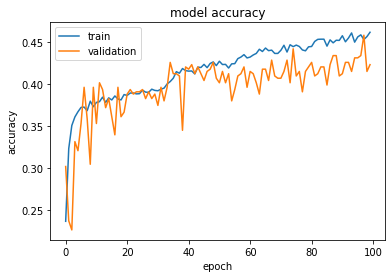

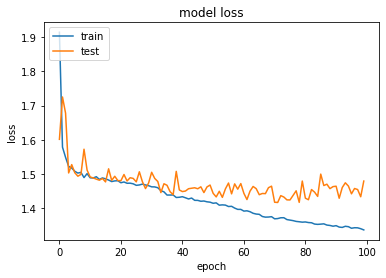

Test loss: 1.4217835664749146
Test accuracy: 0.43752798438072205
F_measure: 0.3008894920349121


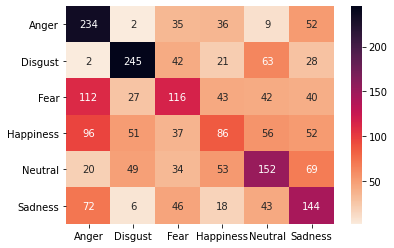

In [ ]:
Model2_1D()

In [ ]:
def Model5_1D():
   model = Sequential()
   model.add(Conv1D(filters=32, kernel_size=7, input_shape = (216,1),padding="same", activation="relu"))
   model.add(Conv1D(filters=32, kernel_size=7,padding="same", activation="relu"))
   model.add(MaxPooling1D(pool_size=2))
   model.add(Dropout(0.5))
   model.add(Conv1D(64, 5, padding="same",  activation='relu'))
   model.add(Conv1D(64, 5, padding="same",  activation='relu'))
   model.add(Conv1D(64, 5, padding="same",  activation='relu'))
   model.add(MaxPooling1D(pool_size=2))
   model.add(Dropout(0.5))
   model.add(Flatten())
   model.add(Dense(units=128, activation='relu'))
   model.add(Dense(units=6, activation='softmax'))
   model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy',f1_m])
   history =model.fit(np.array(Training_ZCR), np.array(Training_Labels),batch_size=40,epochs=40,verbose=1,validation_data=(np.array(Validation_ZCR), np.array(Validation_Labels)))
   
   print('\nhistory dict:', history.history ) 
   Plotting(history)
   Accuracy_Fmeasure_1D(model,Testing_ZCR)
   

Epoch 1/40
121/121 [==============================] - 11s 75ms/step - loss: 0.4934 - accuracy: 0.1850 - f1_m: 2.4846e-04 - val_loss: 0.4414 - val_accuracy: 0.2615 - val_f1_m: 0.0000e+00
Epoch 2/40
121/121 [==============================] - 9s 71ms/step - loss: 0.4297 - accuracy: 0.2944 - f1_m: 0.0632 - val_loss: 0.4345 - val_accuracy: 0.2345 - val_f1_m: 0.0098
Epoch 3/40
121/121 [==============================] - 9s 70ms/step - loss: 0.4154 - accuracy: 0.3231 - f1_m: 0.1236 - val_loss: 0.4154 - val_accuracy: 0.3288 - val_f1_m: 0.1631
Epoch 4/40
121/121 [==============================] - 9s 71ms/step - loss: 0.4058 - accuracy: 0.3583 - f1_m: 0.2015 - val_loss: 0.4071 - val_accuracy: 0.3504 - val_f1_m: 0.1197
Epoch 5/40
121/121 [==============================] - 9s 70ms/step - loss: 0.4021 - accuracy: 0.3692 - f1_m: 0.1977 - val_loss: 0.4205 - val_accuracy: 0.3019 - val_f1_m: 0.1455
Epoch 6/40
121/121 [==============================] - 8s 70ms/step - loss: 0.4040 - accuracy: 0.3651 - f1_

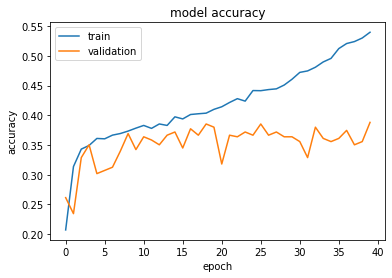

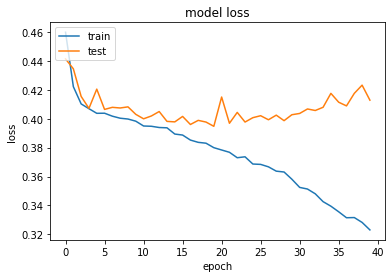

Test loss: 0.42036551237106323
Test accuracy: 0.3654276728630066
F_measure: 0.29947784543037415


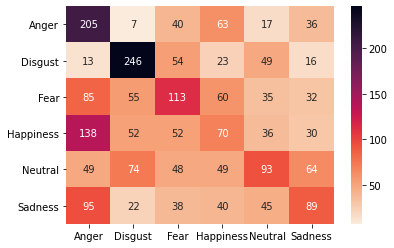

In [ ]:
Model5_1D()  

In [ ]:
def Model3_1D():
  
  model = Sequential()
  model.add(Conv1D(64,3,3, input_shape=(216, 1), padding="same", activation="relu"))
  model.add(Conv1D(128, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
  model.add(MaxPooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.3))
  
  
  model.add(Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.3))
  
  model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
  model.add(Conv1D(256, kernel_size=(3),activation='relu',kernel_regularizer=regularizers.l2(0.1), bias_regularizer=regularizers.l2(0.1)))
  model.add(MaxPooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.3))
  
  model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.1), bias_regularizer=regularizers.l2(0.1)))
  model.add(MaxPooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.3))
  
  model.add(Flatten())
  
  model.add(Dense(units=256,activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=128,activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=6, activation="softmax"))
  
  adam = Adam(lr=0.0001)
  model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',f1_m])
  history =model.fit(np.array(Training_ZCR), np.array(Training_Labels),batch_size=32,epochs=50,verbose=1,validation_data=(np.array(Validation_ZCR), np.array(Validation_Labels)))
  
  print('\nhistory dict:', history.history)
  Plotting(history)
  Accuracy_Fmeasure_1D(model,Testing_ZCR)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
152/152 [==============================] - 21s 120ms/step - loss: 1.7854 - accuracy: 0.1820 - f1_m: 7.0435e-05 - val_loss: 1.7839 - val_accuracy: 0.2399 - val_f1_m: 0.0000e+00
Epoch 2/50
152/152 [==============================] - 17s 115ms/step - loss: 1.7531 - accuracy: 0.2449 - f1_m: 0.0049 - val_loss: 1.7508 - val_accuracy: 0.2911 - val_f1_m: 0.0000e+00
Epoch 3/50
152/152 [==============================] - 17s 115ms/step - loss: 1.7147 - accuracy: 0.2738 - f1_m: 0.0148 - val_loss: 1.7695 - val_accuracy: 0.2049 - val_f1_m: 0.0051
Epoch 4/50
152/152 [==============================] - 17s 115ms/step - loss: 1.6678 - accuracy: 0.3062 - f1_m: 0.0399 - val_loss: 1.6302 - val_accuracy: 0.2965 - val_f1_m: 0.0324
Epoch 5/50
152/152 [==============================] - 18s 115ms/step - loss: 1.6110 - accuracy: 0.3352 - f1_m: 0.0809 - val_loss: 1.5833 - val_accuracy: 0.3100 - val_f1_m: 0.0297
Epoch 6/50
152/152 [==============================] - 18s 115ms/step - loss: 1.6163 - accurac

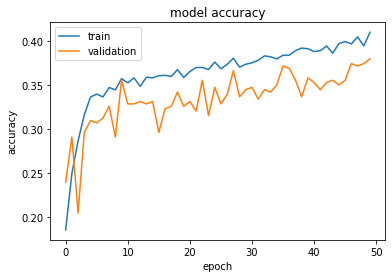

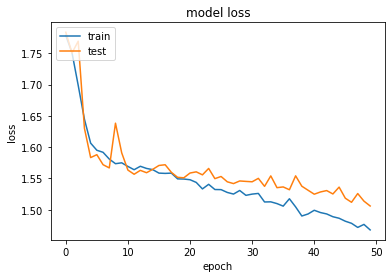

Test loss: 1.4892077445983887
Test accuracy: 0.39632782340049744
F_measure: 0.14304454624652863


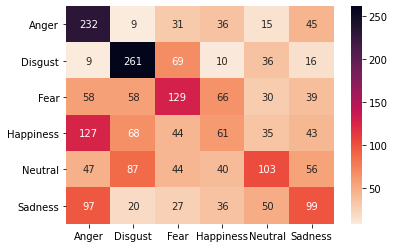

In [ ]:
Model3_1D()